<a href="https://colab.research.google.com/github/VanshikaM03/Topsis-On-Pretrained-Model/blob/main/Topsis_on_Pretrained_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Load your text conversational dataset (replace 'your_dataset.csv' with your actual dataset)
# Assuming your dataset has columns 'text' and 'label'
df = pd.read_csv('/content/speech_emotions.csv')

# Split the dataset into training and testing sets
train_data, test_data, train_labels, test_labels = train_test_split(df['text'], df['label'], test_size=0.2, random_state=42)

# Define vectorizers (you can choose either CountVectorizer or TfidfVectorizer)
vectorizer = TfidfVectorizer()

# Transform text data into numerical features
train_features = vectorizer.fit_transform(train_data)
test_features = vectorizer.transform(test_data)

# Define machine learning models
models = {
    'Multinomial Naive Bayes': MultinomialNB(),
    'Logistic Regression': LogisticRegression(),
    'Support Vector Machine': SVC(),
    'Random Forest': RandomForestClassifier()
}

# Initialize a DataFrame to store results
result_df = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

# Train and evaluate each model
for model_name, model in models.items():
    # Train the model
    model.fit(train_features, train_labels)

    # Predictions on the test set
    predictions = model.predict(test_features)

    # Calculate evaluation metrics
    accuracy = accuracy_score(test_labels, predictions)
    precision = precision_score(test_labels, predictions, average='weighted')
    recall = recall_score(test_labels, predictions, average='weighted')
    f1 = f1_score(test_labels, predictions, average='weighted')

    # Store results in the DataFrame
    result_df = result_df.append({
        'Model': model_name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    }, ignore_index=True)

# Save results to a CSV file
result_df.to_csv('result.csv', index=False)

# Print results in table format
print(result_df)

<ipython-input-22-f173faac9b48>:50: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append({
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
<ipython-input-22-f173faac9b48>:50: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append({
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result)

                     Model  Accuracy  Precision  Recall  F1 Score
0  Multinomial Naive Bayes      0.25   0.166667    0.25  0.200000
1      Logistic Regression      0.50   0.250000    0.50  0.333333
2   Support Vector Machine      0.50   0.250000    0.50  0.333333
3            Random Forest      0.25   0.166667    0.25  0.200000


<ipython-input-22-f173faac9b48>:50: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append({


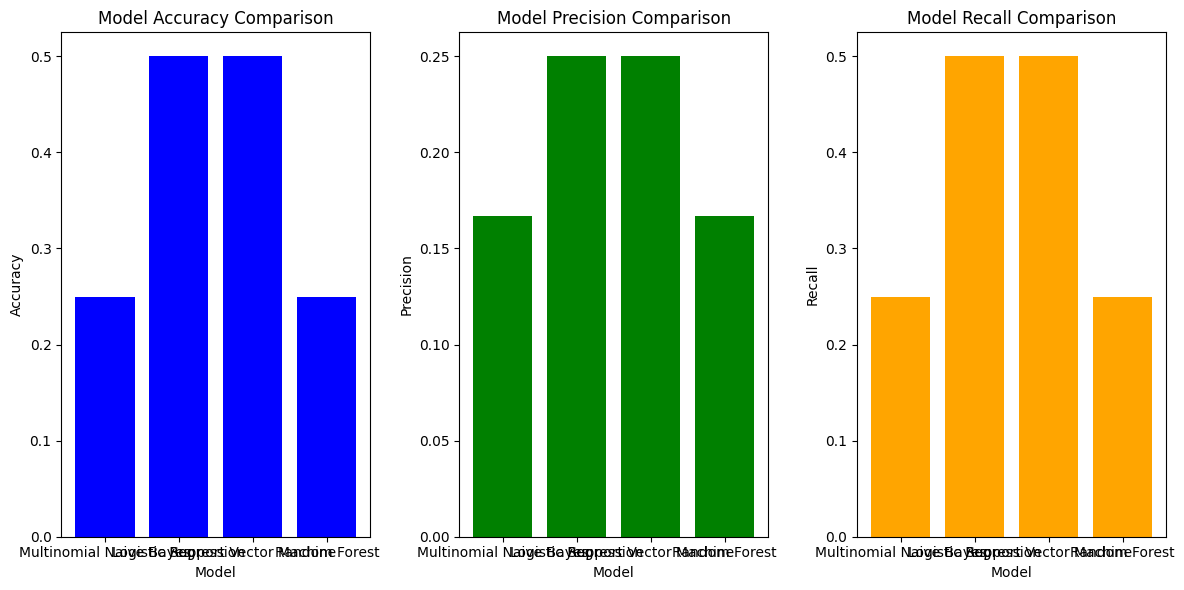

In [21]:
import matplotlib.pyplot as plt
# Plotting the Accuracy
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.bar(result_df['Model'], result_df['Accuracy'], color='blue')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')

plt.subplot(1, 3, 2)
plt.bar(result_df['Model'], result_df['Precision'], color='green')
plt.xlabel('Model')
plt.ylabel('Precision')
plt.title('Model Precision Comparison')

plt.subplot(1, 3, 3)
plt.bar(result_df['Model'], result_df['Recall'], color='orange')
plt.xlabel('Model')
plt.ylabel('Recall')
plt.title('Model Recall Comparison')

plt.tight_layout()
plt.show()
# Similarly, you can plot other metrics like Precision and Recall


In [17]:
import pandas as pd
import numpy as np

# Load the results from the CSV file
result_df = pd.read_csv('result.csv')

# Extract only the numerical metrics for TOPSIS analysis
data = result_df[['Accuracy', 'Precision', 'Recall', 'F1 Score']].values

# Define the weights for each metric (you can adjust these based on your preference)
weights = np.array([0.25, 0.25, 0.25, 0.25])

# Normalize the decision matrix
norm_data = data / np.linalg.norm(data, axis=0)

# Multiply each normalized value by its weight
weighted_matrix = norm_data * weights

# Determine the ideal and non-ideal solutions
ideal_best = np.max(weighted_matrix, axis=0)
ideal_worst = np.min(weighted_matrix, axis=0)

# Calculate the Euclidean distances to the ideal and non-ideal solutions
distance_best = np.linalg.norm(weighted_matrix - ideal_best, axis=1)
distance_worst = np.linalg.norm(weighted_matrix - ideal_worst, axis=1)

# Calculate the TOPSIS score
topsis_score = distance_worst / (distance_best + distance_worst)

# Add TOPSIS score and rank to the DataFrame
result_df['TOPSIS Score'] = topsis_score
result_df['Rank'] = result_df['TOPSIS Score'].rank(ascending=False)

# Print the results with TOPSIS scores and ranks
print(result_df[['Model', 'TOPSIS Score', 'Rank']].sort_values(by='Rank'))


                     Model  TOPSIS Score  Rank
1      Logistic Regression           1.0   1.5
2   Support Vector Machine           1.0   1.5
0  Multinomial Naive Bayes           0.0   3.5
3            Random Forest           0.0   3.5
